<a href="https://colab.research.google.com/github/DongHyukShin93/BigData/blob/main/210611_04_%EC%9A%B8%EB%A6%89%EB%8F%84%EC%9D%98_%EC%B5%9C%EA%B3%A0%EA%B8%B0%EC%98%A8%EA%B3%BC_%EC%B5%9C%EC%A0%80%EA%B8%B0%EC%98%A8%EA%B3%BC_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

울릉도

In [ ]:
# 1990/01/01 ~ 2021/05/31 까지의 최고기온 구하기

import csv

f = open("/content/ulleung.csv","r",encoding="cp949")
data = csv.reader(f)
header = next(data) # column명 자르고 dataset만 가져오기

max_temp = -999
max_date = ""

for row in data :
  if row[-1] == '' : # 결측치 제거하기
    row[-1] = -999
  
  row[-1] = float(row[-1]) # 문자열을 실수형으로 바꿔주기

  if max_temp < row[-1] :
    max_date = row[0]
    max_temp = row[-1]

f.close()

print("1990/01/01 부터 2021/05/31 중에서 최고 기온이 가장 높았던 날은 %s이고, 기온은 %.1f 도입니다." %(max_date, max_temp))

1990/01/01 부터 2021/05/31 중에서 최고 기온이 가장 높았던 날은 2013-08-08이고, 기온은 35.4 도입니다.


In [ ]:
# 1990/01/01 ~ 2021/05/31 까지의 최저기온 구하기

import csv

f = open("/content/ulleung.csv","r",encoding="cp949")
data = csv.reader(f)
header = next(data) # column명 자르고 dataset만 가져오기

min_temp = 999
min_date = ""

for row in data :
  if row[3] == '' : # 결측치 제거하기
    row[3] = 999
  
  row[3] = float(row[3]) # 문자열을 실수형으로 바꿔주기

  if min_temp > row[3] :
    min_date = row[0]
    min_temp = row[3]

f.close() 

print(f"1990/01/01 부터 2021/05/31 중에서 최저 기온이 가장 낮았던 날은 {min_date}이고, 기온은 {min_temp:.1f} 도입니다.")

1990/01/01 부터 2021/05/31 중에서 최저 기온이 가장 낮았던 날은 2003-01-29이고, 기온은 -11.5 도입니다.


그래프 그리기

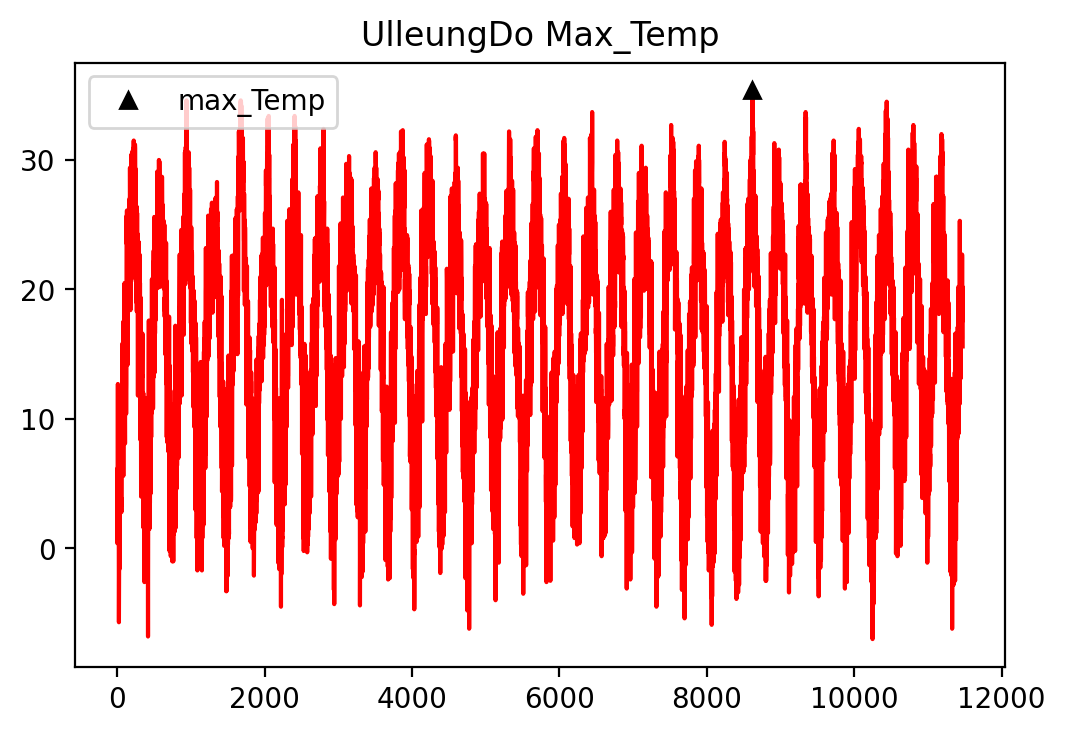

In [ ]:
# 최고기온 그래프 그리기
import csv
import matplotlib.pyplot as plt

f = open("/content/ulleung.csv","r",encoding="cp949")
data = csv.reader(f)
header = next(data) # column명 자르고 dataset만 가져오기

maxTempList = []
for row in data :
  if row[-1] != "" :
    maxTempList.append(float(row[-1])) # maxTempList = [float(row[-1]) for row in data if row[-1] != ""]

f.close()

# 그래프 그리기
plt.figure(dpi=200) # 크기 조절하기
plt.title("UlleungDo Max_Temp")
plt.plot(maxTempList,'r')
plt.plot([8620,], max_temp,'k^',label="max_Temp")
plt.legend(loc=2)
plt.show()

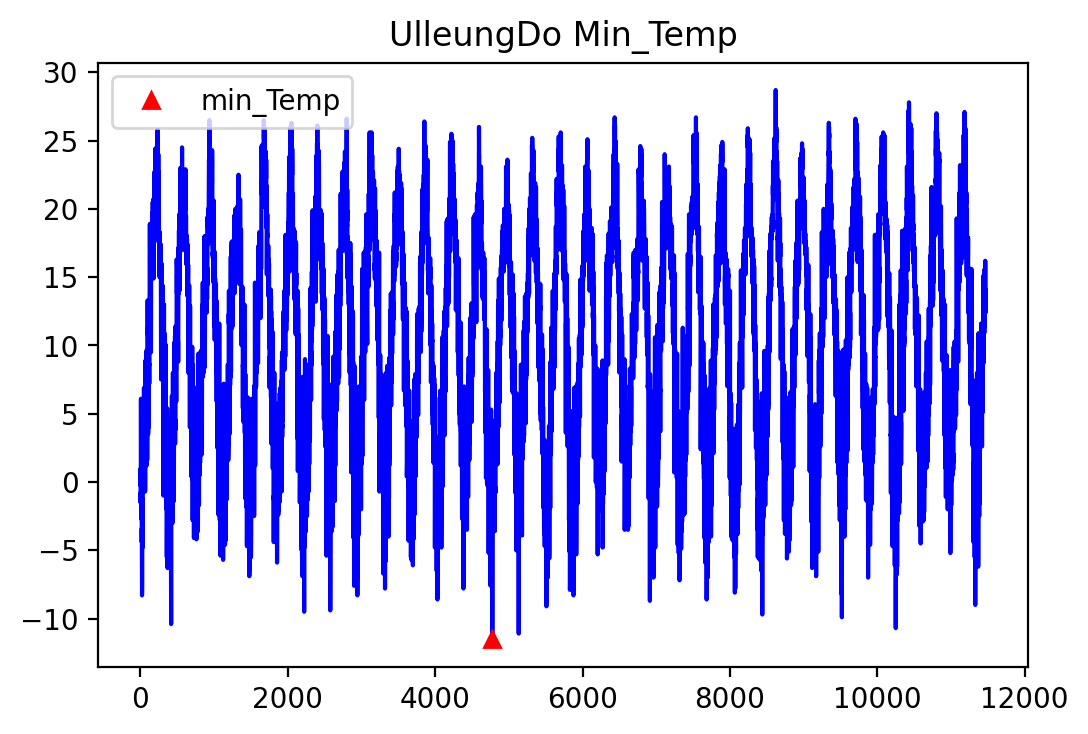

In [ ]:
# 최저기온 그래프 그리기
import csv
import matplotlib.pyplot as plt

f = open("/content/ulleung.csv","r",encoding="cp949")
data = csv.reader(f)
header = next(data)

# minTempList = []
# for row in data :
#   if row[3] != "" :
#     minTempList.append(float(row[3]))
minTempList = [float(row[3]) for row in data if row[3] != ""]

f.close()

# 그래프 그리기
plt.figure(dpi=200) # 크기 조절하기
plt.title("UlleungDo Min_Temp")
plt.plot(minTempList,'b')
plt.plot([4776,], min_temp,'r^',label="min_Temp")
plt.legend(loc=2)
plt.show()

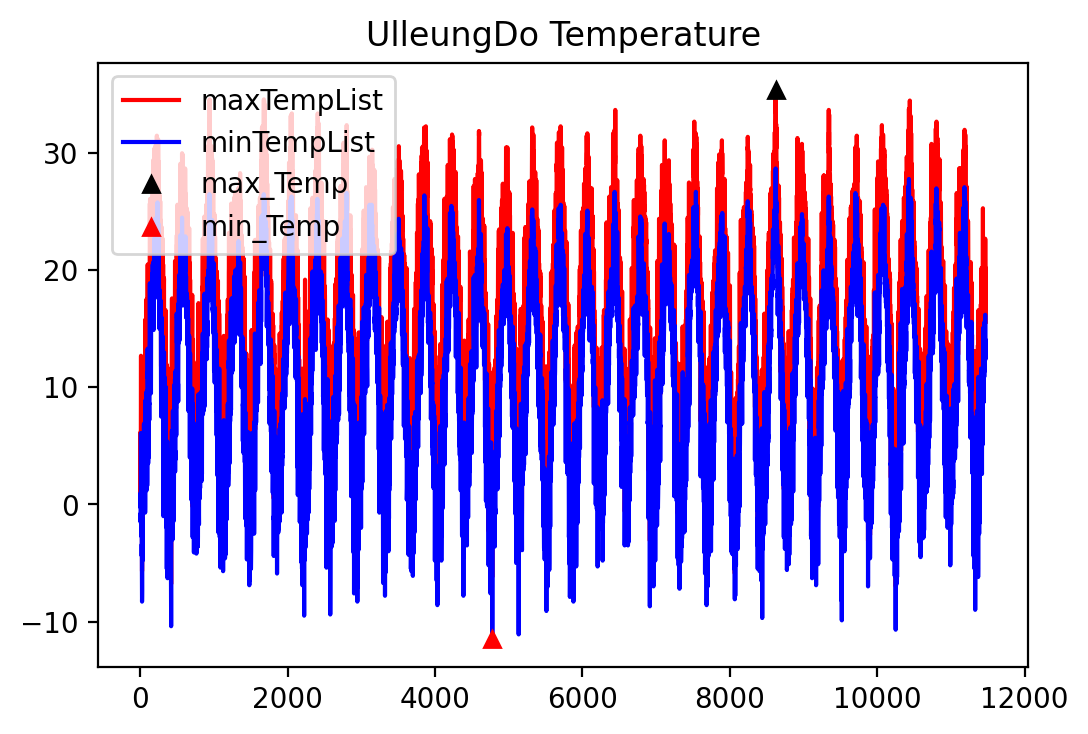

In [ ]:
# 최고기온 최저기온 합친 그래프 그리기

import csv
import matplotlib.pyplot as plt

f = open("/content/ulleung.csv","r",encoding="cp949")
data = csv.reader(f)
header = next(data)

plt.figure(dpi=200)
plt.title("UlleungDo Temperature")
plt.plot(maxTempList,'red',label="maxTempList")
plt.plot(minTempList,'blue',label="minTempList")
plt.plot([8620,], max_temp,'k^',label="max_Temp")
plt.plot([4776,], min_temp,'r^',label="min_Temp")
plt.legend(loc=2)
plt.show()

Pandas로 최고기온과 최저기온 구하기

In [ ]:
import pandas as pd

df = pd.read_csv("/content/ulleung.csv",encoding="cp949")

# 최고기온 중 최고 기온 날짜의 index값과 그 row 찾기
for idx in range(len(df)) :
  if df.iloc[idx, -1] == df["최고기온(℃)"].max() :
    print(idx)

# 최저기온 중 최저 기온 날짜의 index값과 그 row 찾기
for idx in range(len(df)) :
  if df.iloc[idx, 3] == min(df["최저기온(℃)"]) :
    print(idx)

# # pandas 안쓰고 찾기
# for idx in range(len(data)) : # data의 타입이 _csv.reader 타입이라 len()함수가 먹히지 않는다
#   if float(data[idx][-1]) == max_Temp :
#     print(idx)

8620
4776


TypeError: ignored

In [ ]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11474 entries, 0 to 11473
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       11474 non-null  object 
 1   지점       11474 non-null  int64  
 2   평균기온(℃)  11472 non-null  float64
 3   최저기온(℃)  11473 non-null  float64
 4   최고기온(℃)  11474 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 448.3+ KB


In [ ]:
df.shape

(11474, 5)

In [ ]:
max(df["최고기온(℃)"]) # == df["최고기온(℃)"].max()

35.4

In [ ]:
df["최저기온(℃)"].min() # == min(df["최저기온(℃)"])

-11.5

In [ ]:
# 최고기온의 index값 찾기
date = df["날짜"]
maxDate = date[df["최고기온(℃)"] == df["최고기온(℃)"].max()]
maxDate

8620    2013-08-08
Name: 날짜, dtype: object

In [ ]:
# 최저기온의 index값 찾기
date = df["날짜"]
minDate = date[df["최저기온(℃)"] == min(df["최저기온(℃)"])]
minDate

4776    2003-01-29
Name: 날짜, dtype: object

In [ ]:
# 최고기온 중 최고 기온 날짜의 index값과 그 row 찾기
for idx in range(len(df)) :
  if df.iloc[idx,-1] == df["최고기온(℃)"].max() :
    print(idx)

8620


In [ ]:
print(type(df.iloc[8620]))
df.iloc[8620]

<class 'pandas.core.series.Series'>


날짜         2013-08-08
지점                115
평균기온(℃)          31.3
최저기온(℃)            28
최고기온(℃)          35.4
Name: 8620, dtype: object

In [ ]:
print(type(df.iloc[[8620]]))
df.iloc[[8620]]

<class 'pandas.core.frame.DataFrame'>


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
8620,2013-08-08,115,31.3,28.0,35.4
